###### Dataset

In this homework, we will use the California Housing Prices data from Kaggle.

We'll keep working with the 'median_house_value' variable, and we'll transform it to a classification task.

In [37]:
# import python libraries
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [38]:
# set the download url in a variable and download
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [39]:
# download the dateset
#!wget $data -O house_prices.csv

--2022-09-22 22:03:06--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘house_prices.csv’

house_prices.csv    100%[===================>]   1.36M   566KB/s    in 2.5s    

2022-09-22 22:03:09 (566 KB/s) - ‘house_prices.csv’ saved [1423529/1423529]



In [40]:
# read dataset
df = pd.read_csv('house_prices.csv')

In [41]:
# check length of dataset
len(df)

20640

In [42]:
# change fields name to small letters and replace white spaces with underscore
df.columns = df.columns.str.lower().str.replace(' ','_')

# select all the categorical variables and make a list
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# loop through the list change the text to small letters and replace white spaces with underscore
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_').str.replace('<', '')

In [43]:
# transpose table to see column names
df.T

,0,1,2,3,4,5,6,7,8,9,...,20630,20631,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25,...,-121.32,-121.4,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84,...,39.29,39.33,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0,...,11.0,15.0,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0,...,2640.0,2655.0,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0,...,505.0,493.0,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0,...,1257.0,1200.0,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0,...,445.0,432.0,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912,...,3.5673,3.5179,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0,...,112000.0,107200.0,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,near_bay,...,inland,inland,inland,inland,inland,inland,inland,inland,inland,inland


###### Features

In [44]:
# columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

###### Data Preparation

In [45]:
# fSelect only the features from above and fill in the missing values with 0.
df = df.fillna(0)

In [46]:
# Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.
df['rooms_per_household'] = (df['total_rooms'] / df['households']).round()

In [47]:
# Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.
df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms']).round()

In [48]:
# Create a new column population_per_household by dividing the column population by the column households from dataframe.
df['population_per_household'] = (df['population'] / df['households']).round()

###### Question 1
What is the most frequent observation (mode) for the column ocean_proximity?

In [49]:
# the most sort after ocean proximity
df.ocean_proximity.mode()

0    1h_ocean
Name: ocean_proximity, dtype: object

###### Split the data

In [50]:
# import sklearn train test split library
from sklearn.model_selection import train_test_split

In [51]:
# Split your data in train/val/test sets, with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(df, test_size = .2, random_state = 42)

In [52]:
# Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.
df_train_full['above_average'] = (df_train_full.median_house_value > round(df_train_full.median_house_value.mean()))
df_train_full['above_average'] = df_train_full['above_average'].astype(int)

In [53]:
del df_train_full['median_house_value']

In [54]:
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
df_train, df_val = train_test_split(df_train_full, test_size = .33, random_state = 42)

In [55]:
# set the target to variables
y_train = df_train.above_average.values
y_val = df_val.above_average.values

###### Question 2
 * Create the correlation matrix for the numerical features of your train dataset.
   * In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.
  * What are the two features that have the biggest correlation in this dataset?

In [56]:
# determine the correlation between numerical values and median value price
df_train_full.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,above_average
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.028542,0.023304,-0.000696,-0.074333
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,0.109413,-0.026670,0.005923,-0.097202
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,-0.158584,0.030822,0.015949,0.077366
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.135206,-0.045353,-0.024901,0.129528
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,-0.000946,-0.001762,-0.028383,0.057973
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.073454,-0.002172,0.072274,-0.014167
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,-0.082143,-0.003229,-0.027475,0.075293
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.332440,-0.065938,0.022372,0.542839
rooms_per_household,-0.028542,0.109413,-0.158584,0.135206,-0.000946,-0.073454,-0.082143,0.332440,1.000000,-0.083808,-0.005962,0.114797
bedrooms_per_room,0.023304,-0.026670,0.030822,-0.045353,-0.001762,-0.002172,-0.003229,-0.065938,-0.083808,1.000000,0.000397,-0.005086


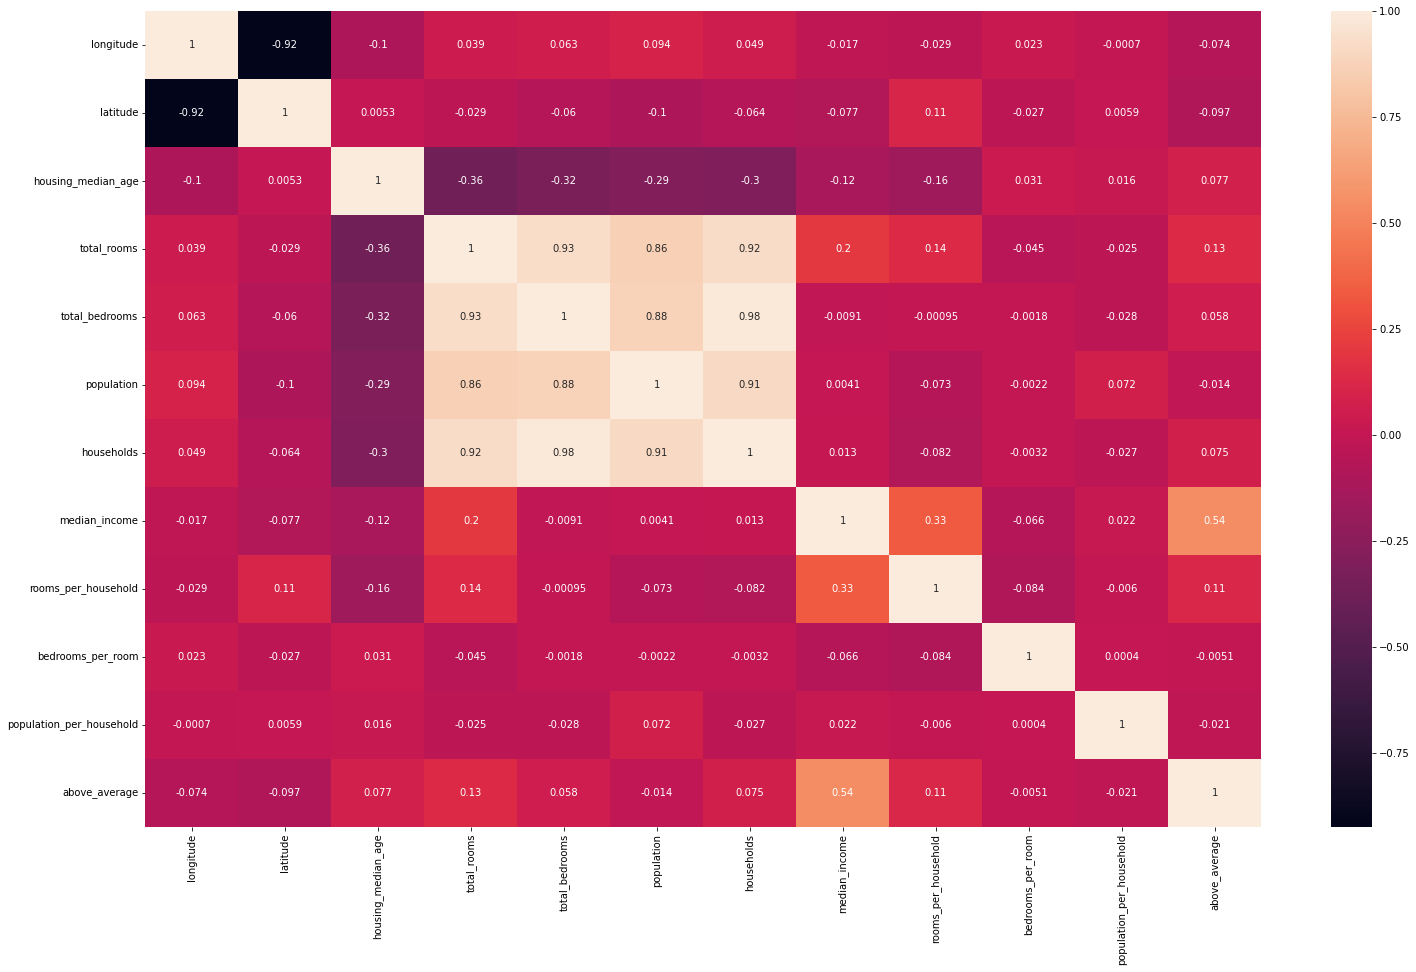

In [57]:
# correlation matrix plot
plt.rcParams['figure.figsize'] = (25.0, 15.0)
sns.heatmap(df_train_full.corr(), annot=True);

###### Make median_house_value binary
We need to turn the median_house_value variable from numeric into binary.

###### Question 3

In [58]:
# import mutual infor score library
from sklearn.metrics import mutual_info_score

In [59]:
# save categprical variable to series
cat = ['ocean_proximity']

In [60]:
# What is the value of mutual information? Round it to 2 decimal digits using round(score, 2)
df_mi = df_train[cat].apply(lambda x: mutual_info_score(x, df_train.above_average))

df_mi = df_mi.sort_values(ascending = False).to_frame(name = 'MI')

display(df_mi)

,MI
ocean_proximity,0.099534


In [61]:
# Make sure that the target value (median_house_value) is not in your dataframe.
del df_train['above_average']
del df_val['above_average']

###### Question 4

In [62]:
# Now let's train a logistic regression
# import logistic regression library
from sklearn.linear_model import LogisticRegression

# DictVectoriser for encoding and transforming categorical variables
from sklearn.feature_extraction import DictVectorizer

In [63]:
# Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.
# convert to dictionary
train_dict = df_train.to_dict(orient = 'records')

In [64]:
# view dictionary
train_dict[0]

{'longitude': -118.46,
 'latitude': 34.22,
 'housing_median_age': 35.0,
 'total_rooms': 2288.0,
 'total_bedrooms': 617.0,
 'population': 2222.0,
 'households': 566.0,
 'median_income': 2.6299,
 'ocean_proximity': '1h_ocean',
 'rooms_per_household': 4.0,
 'bedrooms_per_room': 0.0,
 'population_per_household': 4.0}

In [65]:
# fit the train_dict data in Dictvectoriser
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [66]:
# transform the train_dict data
X_train = dv.transform(train_dict)
X_train.shape

(11063, 16)

In [67]:
# get feautre names of the tranformed data
dv.get_feature_names()

/home/nerd/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=1h_ocean',
 'ocean_proximity=inland',
 'ocean_proximity=island',
 'ocean_proximity=near_bay',
 'ocean_proximity=near_ocean',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [68]:
# Fit the model on the training dataset.
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [69]:
# combining the validation data for encoding
val_dict = df_val.to_dict(orient='records') 
X_val = dv.transform(val_dict)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
# To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.83
